In [1]:
import numpy as np
# import pymc as pm
from random import random, randint, seed
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

### Create a regression dataset with outliers

(100, 1) (100,)


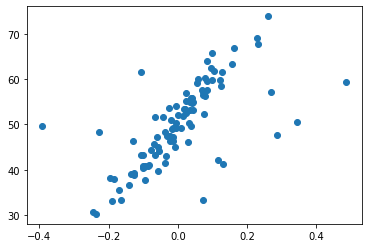

In [2]:

# prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, 
                           n_informative=1, noise=3, bias=50, random_state=1)
    # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y
 
# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

### Linear Regression

In [8]:
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return np.absolute(scores)

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = np.arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()

Mean MAE: 5.260 (1.149)


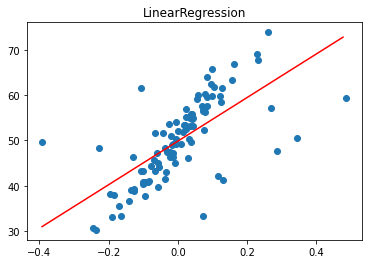

In [9]:
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

In [15]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [16]:
vars(model)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([48.03658059]),
 '_residues': 4361.443966936444,
 'rank_': 1,
 'singular_': array([1.28795283]),
 'intercept_': 49.83184681801059}

### Bayesian Linear Regression

In [18]:
np.mean(y)

50.063037899326716